# ALeRCE client examples

Francisco Förster

Last modification: 20210118

Very simple examples on how to interact with the ALeRCE client

Load libraries

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors
cmap = plt.cm.plasma

In [3]:
from alerce.core import Alerce

# Initialize alerce api object

Let's start the ALeRCE client

In [5]:
client = Alerce()

We will explore different methods from the client:

* Query global properties of an individual object
* Query properties per band of an individual object
* Query detections of an individual object
* Query image stamps
* Crossmatch with objects in the vicinity
* Query non detections of an individual object
* Query features of an individual object
* Query probabilities of an individual object
* Query global properties of a group of objects

# Query properties for an individual object

We will now query the global properties of one object based on a given object id, ZTF20aaelulu in this case. You can see this object in the website https://alerce.online/object/ZTF20aaelulu.


In [6]:
oid = "ZTF20aaelulu"
query_results = client.query_objects(
        oid=oid,
        format='pandas')
properties = query_results # save for later
query_results

,oid,ndethist,ncovhist,mjdstarthist,mjdendhist,corrected,stellar,ndet,g_r_max,g_r_max_corr,...,lastmjd,deltajd,meanra,meandec,sigmara,sigmadec,class,classifier,probability,step_id_corr
0,ZTF20aaelulu,259,792,58855.458808,58967.227049,False,False,58,0.440634,None,...,58967.227049,111.684757,185.728862,15.823611,0.000021,0.000015,None,None,None,corr_bulk_0.0.1


The column names are the following

In [7]:
", ".join(query_results)

'oid, ndethist, ncovhist, mjdstarthist, mjdendhist, corrected, stellar, ndet, g_r_max, g_r_max_corr, g_r_mean, g_r_mean_corr, firstmjd, lastmjd, deltajd, meanra, meandec, sigmara, sigmadec, class, classifier, probability, step_id_corr'

The columns are described in here https://alerce.readthedocs.io/en/latest/models.html

# Query properties per band for an indivual object

In [8]:
query_results = client.query_magstats(
        oid=oid,
        format='pandas')
query_results

,fid,stellar,corrected,ndet,ndubious,magmean,magmedian,magmax,magmin,magsigma,maglast,magfirst,firstmjd,lastmjd,step_id_corr
0,1,False,True,31,0,17.011618,16.972418,18.607530,14.300256,None,18.607530,14.916227,58859.523,58967.227,bulk_version_0.0.1
1,2,False,False,27,0,16.311693,16.427551,18.513012,13.859622,None,18.513012,17.279879,58855.543,58965.285,bulk_version_0.0.1


You can see that the results are different statistics in two rows, one per band. The columns are described in here https://alerce.readthedocs.io/en/latest/models.html

In [9]:
", ".join(query_results)

'fid, stellar, corrected, ndet, ndubious, magmean, magmedian, magmax, magmin, magsigma, maglast, magfirst, firstmjd, lastmjd, step_id_corr'

# Query detections for an individual object

In [10]:
query_results = client.query_detections(
        oid=oid,
        format='pandas')
detections = query_results # save for later
query_results

,mjd,candid,fid,pid,diffmaglim,isdiffpos,nid,distnr,magpsf,magpsf_corr,...,magapbig,sigmagapbig,rfid,has_stamp,corrected,dubious,candid_alert,step_id_corr,phase,parent_candid
0,58855.542292,1101542291015015004,2,1101542291015,20.367030,1,1101,2.120077,17.279879,NaN,...,17.1147,0.0666,576120210.0,False,False,False,None,bulk_1.0.0,None,1121521071015015006
1,58859.481250,1105481241015015001,2,1105481241015,19.761808,1,1105,2.123806,14.768740,NaN,...,14.7761,0.0098,576120210.0,False,False,False,None,bulk_1.0.0,None,1133425771015015000
2,58859.522280,1105522281015015000,1,1105522281015,19.590542,1,1105,0.549287,14.916227,14.601364,...,14.9805,0.0099,576120110.0,False,True,False,None,bulk_1.0.0,None,1133425771015015000
3,58867.440336,1113440331015015001,1,1113440331015,20.265388,1,1113,0.499874,14.300256,14.110689,...,14.3132,0.0043,576120110.0,False,True,False,None,bulk_1.0.0,None,1133425771015015000
4,58867.481562,1113481561015015006,2,1113481561015,20.348034,1,1113,2.172854,13.859622,NaN,...,13.8634,0.0039,576120210.0,False,False,False,None,bulk_1.0.0,None,1133425771015015000
5,58871.442685,1117442681015015004,1,1117442681015,20.396467,1,1117,0.551084,15.030325,14.685591,...,15.0187,0.0075,576120110.0,False,True,False,None,bulk_1.0.0,None,1133425771015015000
6,58871.502234,1117502231015015005,2,1117502231015,20.242445,1,1117,2.161602,14.170009,NaN,...,14.1846,0.0051,576120210.0,False,False,False,None,bulk_1.0.0,None,1133425771015015000
7,58875.456991,1121456991015015006,1,1121456991015,20.504930,1,1121,0.521960,15.676039,15.114477,...,15.6910,0.0133,576120110.0,False,True,False,None,bulk_1.0.0,None,1133425771015015000
8,58875.521076,1121521071015015006,2,1121521071015,20.243944,1,1121,2.198571,14.676664,NaN,...,14.6939,0.0077,576120210.0,False,False,False,None,bulk_1.0.0,None,1133425771015015000
9,58878.360509,1124360501015015005,2,1124360501015,19.797495,1,1124,2.211310,15.056566,NaN,...,15.0152,0.0104,576120210.0,False,False,False,None,bulk_1.0.0,None,1133425771015015000


Now we obtain a list of all the detections in the two bands. The most important columns are the time (mjd), the unique detection identifier (candid), the band (fid), the difference magnitude (magpsf) and its error (sigmapsf). All the field are explained in here The columns are described in here https://alerce.readthedocs.io/en/latest/models.html.

# Query image stamps

We can also query the image stamps associated to a specific object and candid.

We will use the first candid from the previously queried detections.

In [11]:
stamps = client.get_stamps(oid, detections.iloc[0].candid)
print(stamps)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fd61d9fba30>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7fd61dac7a30>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7fd61dac76d0>]


The image stamps are a triplet of science, reference and difference images. Let's look at the first image:

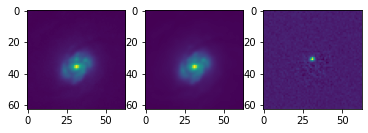

In [12]:
fig, ax = plt.subplots(ncols=3)
for i in range(3):
    ax[i].imshow(stamps[i].data)

We can also directly plot the images stamps using the plot_stamps command.

In [13]:
stamps = client.plot_stamps(oid, detections.iloc[0].candid)
print(stamps)

None


If candid is not given the last one will be used.

In [14]:
stamps = client.plot_stamps(oid)
print(stamps)

None


In [15]:
stamps = client.plot_stamps(oid, detections.candid.max())
print(stamps)

None


# Crossmatch with objects in the vicinity

In [16]:
ra = properties.meanra
dec = properties.meandec
radius = 120 # arcsec
#catalog_name = "GAIA/DR1"
cone_objects = client.catshtm_conesearch(ra, dec, radius, format="pandas")
cone_objects

{'FIRST':          Dec       Fint   FitMajor   FitMinor   FitPosAng  Fpeak      Major  \
 0  15.797722   5.631805   5.680000   5.580000    0.100000   5.18   1.780000   
 1  15.822169   6.063784  10.550000   5.910000  177.000000   2.84   9.060000   
 2  15.822405  37.346027  18.190001  17.610001   95.199997   3.40  17.370001   
 
    Minor      PosAng          RA  SideProb      StartMJD       StopMJD  \
 0   1.41    0.100000  185.744430  0.014053  2.451504e+06  2.451513e+06   
 1   2.41  177.000000  185.730756  0.014053  2.451504e+06  2.451513e+06   
 2  16.76   95.199997  185.728966  0.014053  2.451504e+06  2.451513e+06   
 
         rms       cat_name  
 0  0.154018  catsHTM_FIRST  
 1  0.150016  catsHTM_FIRST  
 2  0.149799  catsHTM_FIRST  ,
 '2MASS':           Dec         Epoch  ErrMaj MagErr_H MagErr_J MagErr_K   Mag_H  \
 0   15.801813  2.451641e+06    0.23    0.236    0.237     None  15.799   
 1   15.802256  2.451641e+06    0.26     0.23    0.256     None  15.942   
 2   15.8047

In [17]:
norm = matplotlib.colors.Normalize(vmin=0, vmax=len(cone_objects.keys()))

We obtained many crossmatches from the [catsHTM](https://arxiv.org/abs/1805.02666_) catalog. Let's look at the catalogs where matches were found:

Let's plot the location of all crossmatches  at the SDSS/DR10 xmatches, highlighting objects with redshift if there are any from the table SpecSDSS.

HSCv2
XMM


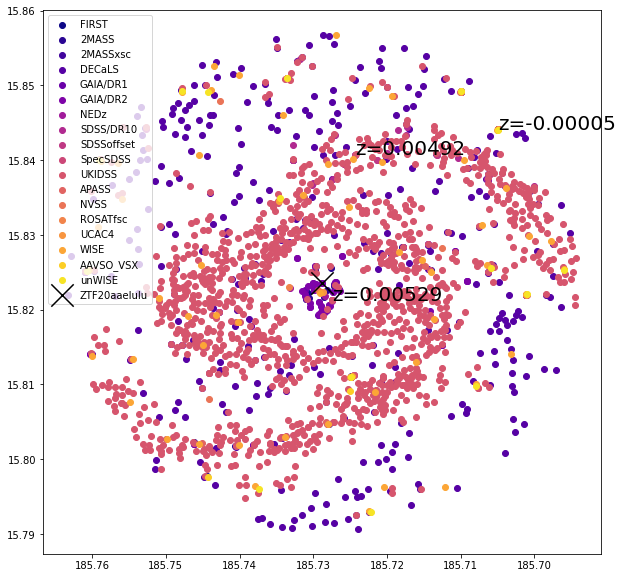

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
for idx, i in enumerate(cone_objects.keys()):
    try:
        aux = cone_objects[i].rename({"RA": "ra", "Dec": "dec"}, axis=1)
        ax.scatter(aux.ra, aux.dec, color=cmap(norm(idx)), label=i)
        if i == "SpecSDSS": # the table with spectroscopic redshifts
            s = 500
            for idxrow, row in aux.iterrows():
                ax.text(row.ra, row.dec, "z=%.5f" % row.z, fontsize=20)
    except:
        print(i)
        
ax.scatter(ra, dec, c='k', marker='x', s=500, label=oid)
ax.set_xlim(ax.get_xlim()[::-1])
plt.legend()

# Query non detections (limiting magnitudes) for an individual object

In [19]:
query_results = client.query_non_detections(
        oid=oid,
        format='pandas')
query_results

,mjd,fid,diffmaglim
0,58828.547824,1,19.2005
1,58831.548472,1,19.4442
2,58833.565347,1,18.8578
3,58834.523704,2,18.8942
4,58837.462141,2,19.5815
5,58837.546817,1,19.6237
6,58838.569375,2,18.4409
7,58846.546181,1,20.4808
8,58846.567025,2,20.4058
9,58849.503183,1,20.5516


This is a much simpler dataframe, with time (mjd), band (fid) and limiting magnitude (diffmaglim).

# Query features for an individual object

Now we will query the features used by our light curve classifier. These are hand made statistics or contextual information based on the object's light curve.

In [20]:
query_results = client.query_features(
        oid=oid,
        format='pandas')
query_results

,name,value,fid,version
0,gal_b,76.900066,0,lc_classifier_1.2.1-P
1,gal_l,271.133944,0,lc_classifier_1.2.1-P
2,g-r_max,0.440634,12,lc_classifier_1.2.1-P
3,g-r_mean,0.734401,12,lc_classifier_1.2.1-P
4,g-r_max_corr,NaN,12,lc_classifier_1.2.1-P
...,...,...,...,...
173,W2-W3,NaN,0,lc_classifier_1.2.1-P
174,g-W2,NaN,0,lc_classifier_1.2.1-P
175,g-W3,NaN,0,lc_classifier_1.2.1-P
176,r-W2,NaN,0,lc_classifier_1.2.1-P


You can see that there are 178 rows, where each row has a feature name (name), a value (value), a band id (fid), and a feature version (version).

A detailed explanation of all the features can be found in http://alerce.science/features/.

# Query probabilities for an individual object

In [21]:
query_results = client.query_probabilities(
        oid=oid,
        format='pandas')
query_results

,classifier_name,classifier_version,class_name,probability,ranking
0,lc_classifier,hierarchical_rf_1.1.0,AGN,0.000036,15
1,lc_classifier,hierarchical_rf_1.1.0,Blazar,0.000144,12
2,lc_classifier,hierarchical_rf_1.1.0,CEP,0.001640,8
3,lc_classifier,hierarchical_rf_1.1.0,CV/Nova,0.005640,5
4,lc_classifier,hierarchical_rf_1.1.0,DSCT,0.000600,11
5,lc_classifier,hierarchical_rf_1.1.0,E,0.000900,10
6,lc_classifier,hierarchical_rf_1.1.0,LPV,0.003320,6
7,lc_classifier,hierarchical_rf_1.1.0,Periodic-Other,0.001280,9
8,lc_classifier,hierarchical_rf_1.1.0,QSO,0.000048,14
9,lc_classifier,hierarchical_rf_1.1.0,RRL,0.002260,7


We see that we get many rows for a single object. This shows all the probabilities associated to all the ALeRCE classifiers and the classes in their associated taxonomies. The columns indicate the name of the classifier (classifier_name), its version (classifier_version), the class (class_name), the probability (probability) and the ranking (ranking) growing from most to least likely. 

The classifiers are two classifiers, the `lc_classifier` and the `stamp_classifier`, where `lc_classifier` is a hierarchical classifier composed of four independent classifiers: `lc_classifier_top`, `lc_classifier_periodic`, `lc_classifier_stochastic`, and `lc_classifier_transient`. You can see more details about these classifiers in [Sánchez-Sáez+2021](https://ui.adsabs.harvard.edu/abs/2021AJ....161..141S/abstract) and [Carrasco-Davis+2021](https://ui.adsabs.harvard.edu/abs/2020arXiv200803309C/abstract). 

`lc_classifier`:
* AGN
* Blazar
* CEP
* CV/Nova
* DSCT
* E
* LPV
* Periodic-Other
* QSO
* RRL
* SLSN
* SNIa
* SNIbc
* SNII
* YSO

`stamp_classifier`:
* AGN
* asteroid
* bogus
* SN
* VS


`lc_classifier_top`:
* Periodic
* Stochastic
* Transient

`lc_classifier_periodic`:
* CEP
* DSCT
* E
* LPV
* Periodic-Other
* RRL

`lc_classifier_stochastic`:
* AGN
* Blazar
* CV/Nova
* QSO
* YSO

`lc_classifier_transient`:
* SLSN
* SNIa
* SNIbc
* SNII

# Query global properties of a set of objects

## Query objects based on the most likely class

We will query the top 1000 objects classified SNIa according to the light curve classifier. In here we ask for the top 1000 objects in pandas format. By default this query asks for objects with classification ranking=1.

In [22]:
query_results = client.query_objects(
        classifier="lc_classifier",
        class_name="SNIa",
        page_size=300,
        format='pandas')

In [23]:
query_results

,oid,ndethist,ncovhist,mjdstarthist,mjdendhist,corrected,stellar,ndet,g_r_max,g_r_max_corr,...,lastmjd,deltajd,meanra,meandec,sigmara,sigmadec,class,classifier,probability,step_id_corr
0,ZTF17aaahrni,36,526,58095.300729,59471.461863,False,False,16,-0.082527,NaN,...,59471.461863,319.017836,80.423285,-4.186246,0.000033,0.000032,SNIa,lc_classifier,0.289344,correction_1.0.6
1,ZTF17aabpncv,31,1526,58105.149630,58836.142454,True,True,25,0.612555,0.628680,...,58836.142454,8.895833,26.253735,60.332168,0.000035,0.000027,SNIa,lc_classifier,0.322056,corr_bulk_0.0.1
2,ZTF17aacnauq,152,2264,58076.390394,59430.496134,True,True,56,-0.098400,-0.073447,...,59430.493715,203.289769,90.235556,36.741275,0.000048,0.000041,SNIa,lc_classifier,0.463684,correction_1.0.6
3,ZTF17aadlxmv,97,736,58052.466725,59180.538796,True,False,32,-0.003809,0.436058,...,59180.538796,317.187326,127.448286,33.906402,0.000106,0.000208,SNIa,lc_classifier,0.393120,corr_bulk_0.0.1
4,ZTF18aaaehwv,25,746,58131.185231,59115.409676,True,True,13,-0.074289,-0.065377,...,59115.409676,6.916053,90.598010,40.200618,0.000038,0.000019,SNIa,lc_classifier,0.434404,corr_bulk_0.0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,ZTF18abhqdpv,30,40,58316.415208,58376.341181,True,False,30,-0.058804,0.266706,...,58376.341181,59.925972,339.337950,22.379588,0.000036,0.000034,SNIa,lc_classifier,0.434000,corr_bulk_0.0.1
296,ZTF18abhxidv,64,93,58317.336852,58373.172546,True,False,25,-0.055693,0.303277,...,58373.172546,55.835694,275.770770,27.471083,0.000025,0.000036,SNIa,lc_classifier,0.538920,corr_bulk_0.0.1
297,ZTF18abhxidx,25,43,58311.337488,58349.270926,True,False,16,0.149078,0.274683,...,58349.270926,37.933438,275.968699,27.248327,0.000050,0.000045,SNIa,lc_classifier,0.424000,corr_bulk_0.0.1
298,ZTF18abiakdr,22,1736,58317.384572,59084.317141,False,False,15,-0.077229,NaN,...,59084.316204,766.931632,319.120499,45.540374,0.000023,0.000014,SNIa,lc_classifier,0.189152,corr_bulk_0.0.1


Note that now the columns class, lc_classifier, and probability are populated.

## Query objects by classified ranking

When an object is classified by our classifiers, a ranking column is also populated to be able to quickly extract the most likely class (ranking=1). We can also extract objects that were classified as SNIa as the 2nd or 3rd most likely classes. Note that not asking for a ranking is equivalent to asking for ranking=1 (the most likely class). 

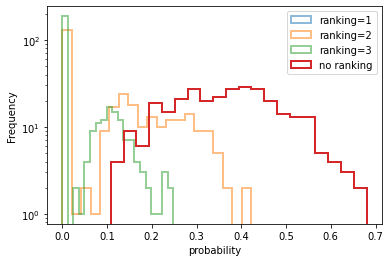

In [24]:
fig, ax = plt.subplots()

for ranking in [1, 2, 3]:
    query_results = client.query_objects(
        classifier="lc_classifier",
        class_name="SNIa",
        ranking=ranking,
        page_size=300,
        format='pandas')
    query_results.probability.plot.hist(bins=20, ax=ax, lw=2, log=True,
                                        alpha=0.5, histtype='step', label="ranking=%i" % ranking)
query_results = client.query_objects(
        classifier="lc_classifier",
        class_name="SNIa",
        page_size=300,
        format='pandas')
query_results.probability.plot.hist(bins=20, ax=ax, lw=2, log=True, histtype='step', label="no ranking")

ax.set_xlabel("probability")
plt.legend()

You can see that the probabilities of no ranking and ranking=1 overlap because ranking=1 is the default value. Also, the typical probabilities of ranking=1 > ranking=2 > ranking=3. 

# Let's now generate a link to look at all the previous objects

In [25]:
"https://alerce.online/?" + "&".join("oid=%s" % i for i in query_results.oid) + "&count=true&page=1&perPage=1000&sortDesc=false&selectedClassifier=stamp_classifier"

'https://alerce.online/?oid=ZTF17aaahrni&oid=ZTF17aabpncv&oid=ZTF17aacnauq&oid=ZTF17aadlxmv&oid=ZTF18aaaehwv&oid=ZTF18aaaqexr&oid=ZTF18aabcaff&oid=ZTF18aabeszt&oid=ZTF18aaciybg&oid=ZTF18aaclshi&oid=ZTF18aacnlxz&oid=ZTF18aaconvk&oid=ZTF18aacqksn&oid=ZTF18aacrhmh&oid=ZTF18aadaexi&oid=ZTF18aadlaxo&oid=ZTF18aadrhsi&oid=ZTF18aadsuxd&oid=ZTF18aadvbjz&oid=ZTF18aadvsxy&oid=ZTF18aadvwyz&oid=ZTF18aadzfso&oid=ZTF18aaeryml&oid=ZTF18aaewdgq&oid=ZTF18aafevzi&oid=ZTF18aaflyqi&oid=ZTF18aafpfwr&oid=ZTF18aafuszq&oid=ZTF18aafzcbw&oid=ZTF18aafzers&oid=ZTF18aagazmu&oid=ZTF18aagljdt&oid=ZTF18aagtwyh&oid=ZTF18aahatvc&oid=ZTF18aahbypm&oid=ZTF18aahfbqp&oid=ZTF18aahfkwu&oid=ZTF18aahlttt&oid=ZTF18aahsuyl&oid=ZTF18aahtjsc&oid=ZTF18aahvndq&oid=ZTF18aaiemyk&oid=ZTF18aaihqaf&oid=ZTF18aailmnv&oid=ZTF18aailsok&oid=ZTF18aaisgnk&oid=ZTF18aaisqmw&oid=ZTF18aaiumgp&oid=ZTF18aaiuynw&oid=ZTF18aaivonj&oid=ZTF18aaixjrc&oid=ZTF18aaiykoz&oid=ZTF18aaizerg&oid=ZTF18aaizgoq&oid=ZTF18aajeaby&oid=ZTF18aajhhwu&oid=ZTF18aajjexl&oid=ZTF

Copy and paste the previous link to your browser.